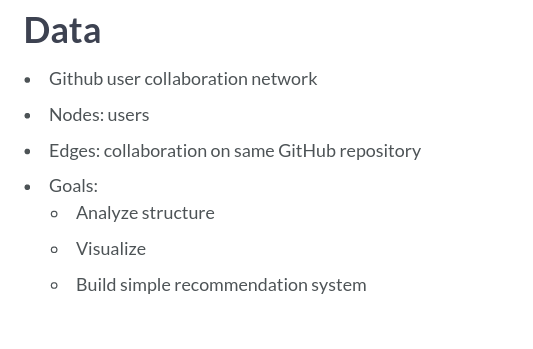

In [1]:
!wget https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p

--2020-02-16 21:08:12--  https://assets.datacamp.com/production/repositories/580/datasets/69ada08d5cce7f35f38ffefe8f2291b7cfcd6000/github_users.p
Resolving assets.datacamp.com (assets.datacamp.com)... 54.192.151.57, 54.192.151.84, 54.192.151.30, ...
Connecting to assets.datacamp.com (assets.datacamp.com)|54.192.151.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2538442 (2.4M)
Saving to: ‘github_users.p’

github_users.p      100%[===================>]   2.42M   241KB/s    in 11s     

2020-02-16 21:08:24 (229 KB/s) - ‘github_users.p’ saved [2538442/2538442]



In [3]:
import pickle
import networkx as nx

g = nx.read_gpickle("github_users.p")

In [4]:
node = list(g.nodes())[:50]
s = g.subgraph(node)

In [6]:
s.node()

NodeView(('u4', 'u11', 'u5', 'u7', 'u3', 'u38', 'u43', 'u25', 'u40', 'u15', 'u17', 'u6', 'u12', 'u14', 'u23', 'u18', 'u30', 'u33', 'u50', 'u48', 'u42', 'u8', 'u28', 'u49', 'u35', 'u26', 'u16', 'u21', 'u32', 'u34', 'u41', 'u46', 'u13', 'u39', 'u1', 'u22', 'u37', 'u45', 'u9', 'u10', 'u20', 'u29', 'u44', 'u31', 'u27', 'u24', 'u36', 'u19', 'u47', 'u2'))

In [9]:
len(s.edges())

6

In [10]:
len(s.node())

50

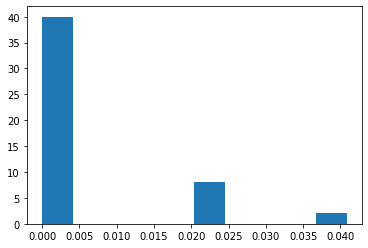

In [12]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(s).values()))
plt.show()

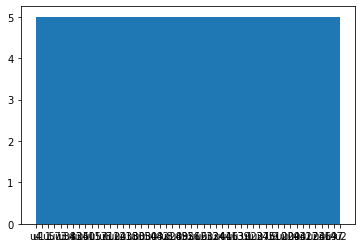

In [14]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(s)))
plt.show()

In [15]:
G = s

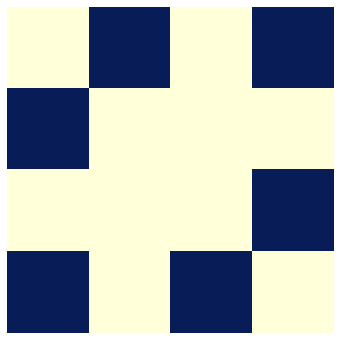

In [19]:
from nxviz import MatrixPlot
import matplotlib.pyplot as plt

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs)

# Draw the MatrixPlot to the screen
h.draw()
plt.show()


In [22]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(n, d)

# Create the ArcPlot object: a
a = ArcPlot(G, node_grouping='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

AttributeError: 'str' object has no attribute 'degree'

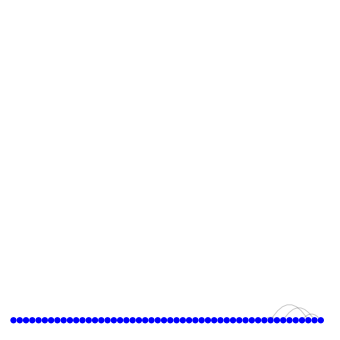

In [23]:
# Import necessary modules
from nxviz.plots import ArcPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = ArcPlot(G, node_grouping='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

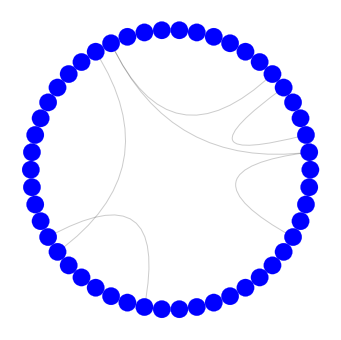

In [25]:
# Import necessary modules
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the CircosPlot object: c
c = CircosPlot(G)

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

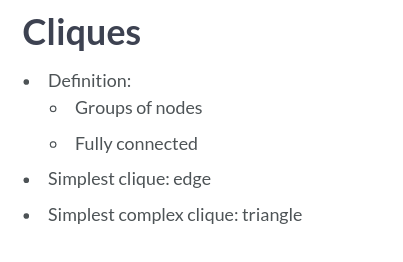

In [26]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

46


In [28]:
# Import necessary modules
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

AssertionError: 

In [29]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)


['u16', 'u29']


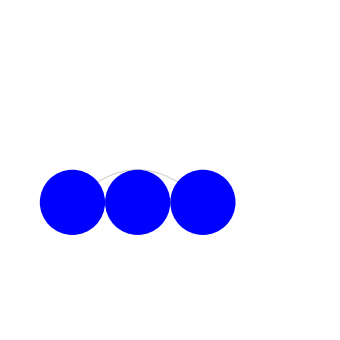

In [30]:
# Import necessary modules
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [31]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


IndexError: list index out of range